# Demonstração KDD



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Instalar e usar uma nova biblioteca para Análise Exploratória

In [2]:
!pip install sweetviz
import sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 21.2 MB/s eta 0:00:00


Carregar um arquivo de uma base dos jogos de tenis de 2021

In [3]:
arquivo = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv'
df = pd.read_csv(arquivo)

In [4]:
dados = pd.read_csv(arquivo)
dados

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0096,Tokyo Olympics,Hard,64,A,20210724,237,126207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1228.0,71.0,996.0
1,2021-0096,Tokyo Olympics,Hard,64,A,20210724,238,105526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1410.0,95.0,829.0
2,2021-0096,Tokyo Olympics,Hard,64,A,20210724,239,111576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,160.0,471.0,197.0,354.0
3,2021-0096,Tokyo Olympics,Hard,64,A,20210724,240,105357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1476.0,61.0,1106.0
4,2021-0096,Tokyo Olympics,Hard,64,A,20210724,241,207830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,145.0,525.0,137.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,2021-9210,Laver Cup,Hard,8,A,20210924,102,126610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5173.0,11.0,3368.0
2729,2021-9210,Laver Cup,Hard,8,A,20210924,103,106421,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10575.0,12.0,3310.0
2730,2021-9210,Laver Cup,Hard,8,A,20210924,104,126094,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6130.0,15.0,2800.0
2731,2021-9210,Laver Cup,Hard,8,A,20210924,105,100644,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7760.0,22.0,2171.0


In [5]:
eda = sweetviz.analyze(dados)
eda.show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:

eda.show_notebook() # mostra no jupyter notebook


Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Traduzindo as colunas do DataFrame 'dados':

traducao_colunas = {
    'tourney_id': 'ID do Torneio',
    'tourney_name': 'Nome do Torneio',
    'surface': 'Superfície da Quadra',
    'draw_size': 'Tamanho da Chave',
    'tourney_level': 'Nível do Torneio',
    'tourney_date': 'Data do Torneio',
    'match_num': 'Número da Partida',
    'winner_id': 'ID do Vencedor',
    'winner_seed': 'Cabeça de Chave do Vencedor',
    'winner_entry': 'Tipo de Entrada do Vencedor',
    'winner_name': 'Nome do Vencedor',
    'winner_hand': 'Mão Dominante do Vencedor',
    'winner_ht': 'Altura do Vencedor',
    'winner_ioc': 'Código do País do Vencedor',
    'winner_age': 'Idade do Vencedor',
    'winner_rank': 'Ranking do Vencedor',
    'winner_rank_points': 'Pontos no Ranking do Vencedor',
    'loser_id': 'ID do Perdedor',
    'loser_seed': 'Cabeça de Chave do Perdedor',
    'loser_entry': 'Tipo de Entrada do Perdedor',
    'loser_name': 'Nome do Perdedor',
    'loser_hand': 'Mão Dominante do Perdedor',
    'loser_ht': 'Altura do Perdedor',
    'loser_ioc': 'Código do País do Perdedor',
    'loser_age': 'Idade do Perdedor',
    'loser_rank': 'Ranking do Perdedor',
    'loser_rank_points': 'Pontos no Ranking do Perdedor',
    'score': 'Placar da Partida',
    'best_of': 'Melhor de (Número de Sets)',
    'round': 'Rodada do Torneio',
    'minutes': 'Duração da Partida em Minutos',
    'w_ace': 'Aces do Vencedor',
    'w_df': 'Duplas Faltas do Vencedor',
    'w_svpt': 'Pontos de Saque do Vencedor',
    'w_1stIn': 'Primeiros Saques Dentro do Vencedor',
    'w_1stWon': 'Pontos Ganhos no Primeiro Saque do Vencedor',
    'w_2ndWon': 'Pontos Ganhos no Segundo Saque do Vencedor',
    'w_SvGms': 'Games de Saque do Vencedor',
    'w_bpSaved': 'Break Points Salvos pelo Vencedor',
    'w_bpFaced': 'Break Points Enfrentados pelo Vencedor',
    'l_ace': 'Aces do Perdedor',
    'l_df': 'Duplas Faltas do Perdedor',
    'l_svpt': 'Pontos de Saque do Perdedor',
    'l_1stIn': 'Primeiros Saques Dentro do Perdedor',
    'l_1stWon': 'Pontos Ganhos no Primeiro Saque do Perdedor',
    'l_2ndWon': 'Pontos Ganhos no Segundo Saque do Perdedor',
    'l_SvGms': 'Games de Saque do Perdedor',
    'l_bpSaved': 'Break Points Salvos pelo Perdedor',
    'l_bpFaced': 'Break Points Enfrentados pelo Perdedor'
}

# Renomeando as colunas do DataFrame 'dados'
dados_traduzido = dados.rename(columns=traducao_colunas)

# Exibindo as primeiras linhas do DataFrame traduzido
dados_traduzido.head(15)


,ID do Torneio,Nome do Torneio,Superfície da Quadra,Tamanho da Chave,Nível do Torneio,Data do Torneio,Número da Partida,ID do Vencedor,Cabeça de Chave do Vencedor,Tipo de Entrada do Vencedor,...,Primeiros Saques Dentro do Perdedor,Pontos Ganhos no Primeiro Saque do Perdedor,Pontos Ganhos no Segundo Saque do Perdedor,Games de Saque do Perdedor,Break Points Salvos pelo Perdedor,Break Points Enfrentados pelo Perdedor,Ranking do Vencedor,Pontos no Ranking do Vencedor,Ranking do Perdedor,Pontos no Ranking do Perdedor
0,2021-0096,Tokyo Olympics,Hard,64,A,20210724,237,126207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,1228.0,71.0,996.0
1,2021-0096,Tokyo Olympics,Hard,64,A,20210724,238,105526,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,1410.0,95.0,829.0
2,2021-0096,Tokyo Olympics,Hard,64,A,20210724,239,111576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,160.0,471.0,197.0,354.0
3,2021-0096,Tokyo Olympics,Hard,64,A,20210724,240,105357,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1476.0,61.0,1106.0
4,2021-0096,Tokyo Olympics,Hard,64,A,20210724,241,207830,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,145.0,525.0,137.0,570.0
5,2021-0096,Tokyo Olympics,Hard,64,A,20210724,242,105062,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,123.0,652.0,62.0,1063.0
6,2021-0096,Tokyo Olympics,Hard,64,A,20210724,243,136440,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,57.0,1153.0,80.0,916.0
7,2021-0096,Tokyo Olympics,Hard,64,A,20210724,244,200175,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1309.0,115.0,722.0
8,2021-0096,Tokyo Olympics,Hard,64,A,20210724,245,106218,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,64.0,1047.0,98.0,812.0
9,2021-0096,Tokyo Olympics,Hard,64,A,20210724,246,106078,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,79.0,926.0,102.0,779.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


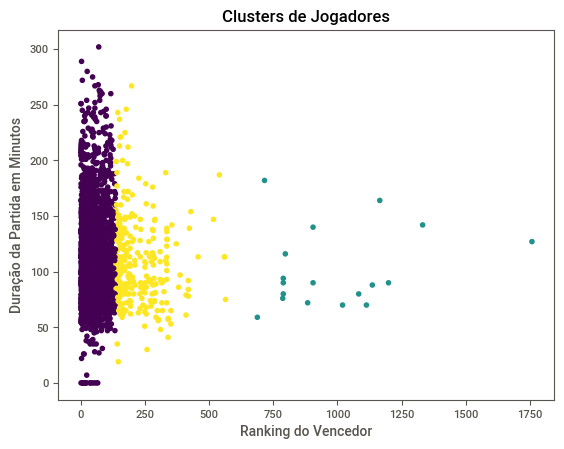

In [17]:
import matplotlib.pyplot as plt
# 1. SELEÇÃO: Escolha dos dados relevantes para o problema.
# Neste caso, vamos selecionar colunas específicas do DataFrame 'dados_traduzido'.

dados_selecionados = dados_traduzido[['Nome do Torneio', 'Superfície da Quadra', 'Nome do Vencedor', 'Ranking do Vencedor', 'Nome do Perdedor', 'Ranking do Perdedor', 'Duração da Partida em Minutos']]

# 2. PRÉ-PROCESSAMENTO: Limpeza e tratamento dos dados.
# Vamos lidar com valores ausentes (NaN) substituindo-os pela média da coluna.
# Selecione apenas as colunas numéricas para calcular a média
colunas_numericas = ['Ranking do Vencedor', 'Ranking do Perdedor', 'Duração da Partida em Minutos']
dados_pre_processados = dados_selecionados.copy()
dados_pre_processados[colunas_numericas] = dados_selecionados[colunas_numericas].fillna(dados_selecionados[colunas_numericas].mean())

# 3. TRANSFORMAÇÃO: Conversão dos dados para um formato adequado para mineração.
# Podemos, por exemplo, converter a coluna 'Superfície da Quadra' em valores numéricos usando Label Encoding.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dados_pre_processados['Superfície da Quadra'] = le.fit_transform(dados_pre_processados['Superfície da Quadra'])

# 4. DATA MINING: Aplicação de algoritmos de mineração de dados.
# Vamos usar um algoritmo de clustering K-Means para agrupar jogadores com base em seu ranking e duração média das partidas.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
dados_clusterizados = dados_pre_processados.copy()
dados_clusterizados['Cluster'] = kmeans.fit_predict(dados_clusterizados[['Ranking do Vencedor', 'Duração da Partida em Minutos']])

# 5. INTERPRETAÇÃO: Análise dos resultados da mineração e extração de conhecimento.
# Podemos analisar os clusters gerados e tentar identificar características comuns entre os jogadores de cada grupo.


plt.scatter(dados_clusterizados['Ranking do Vencedor'], dados_clusterizados['Duração da Partida em Minutos'], c=dados_clusterizados['Cluster'])
plt.xlabel('Ranking do Vencedor')
plt.ylabel('Duração da Partida em Minutos')
plt.title('Clusters de Jogadores')
plt.show()


Cada ponto no gráfico representa um jogador, com sua posição determinada pelo ranking do vencedor e a duração média das partidas.

As diferentes cores representam os clusters identificados pelo algoritmo K-Means.
Jogadores no mesmo cluster tendem a ter características semelhantes em termos de ranking e duração das partidas.

A análise do gráfico pode revelar padrões interessantes sobre os jogadores. Por exemplo:

Clusters com jogadores de ranking mais alto e partidas mais longas podem indicar jogadores mais experientes e com maior resistência física.

Clusters com jogadores de ranking mais baixo e partidas mais curtas podem indicar jogadores menos experientes ou com um estilo de jogo mais agressivo.

A distância entre os clusters pode indicar a diferença entre os grupos de jogadores.
Clusters mais distantes sugerem maior diferença nas características dos jogadores.